# Abstract
The document outlines a comprehensive data cleaning process involving handling missing values, feature engineering, and predictive modeling. It emphasizes imputing missing 'Total' values via calculation from 'Quantity' and 'Price,' followed by predicting missing 'Product' entries using a classification model trained on existing data. The approach underscores integrating machine learning to enhance data completeness, culminating in a cleaned dataset ready for analysis, with insights into sales, product popularity, and customer activity.

## Key Points
The dataset was initially inspected, revealing missing values in the 'Product' and 'Total' columns, which were addressed through imputation.
Missing 'Total' values were filled by multiplying 'Quantity' and 'Price' within the dataset.
The data was split into two subsets: df_train with known 'Product' values and df_predict with missing 'Product' data, for training and prediction respectively.

A classification model (Random Forest) was trained on the labeled 'Product' data using 'Price' as the feature.
The trained model predicted the missing 'Product' entries based on their 'Price,' after which predictions were decoded and merged back into the dataset.

Post-imputation, the dataset was consolidated, sorted, and checked to ensure absence of missing 'Product' values.
Summary statistics, including total sales, top products by quantity, average order value, and top active customers, were generated from the cleaned dataset for business insights.

# Step 1: Setup Environment

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step 2: Load the Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/3MTT FOLDER/MINI_PROJECTS/Module_2_mini_project/Dataset.csv')


# Step 3: Clean the Data

In [ ]:
# Preview the data
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')



   OrderID        Date CustomerID  Product  Quantity  Price    Total
0        1  2024-04-12       C002    Phone         1    600   642.09
1        2  2024-12-14       C003   Laptop         2   1000  2098.39
2        3  2024-09-27       C017  Monitor         1    200   196.34
3        4  2024-04-16       C005    Phone         3    600  1955.86
4        5  2024-03-12       C017   Laptop         1   1000  1098.19
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     200 non-null    int64  
 1   Date        200 non-null    object 
 2   CustomerID  200 non-null    object 
 3   Product     190 non-null    object 
 4   Quantity    200 non-null    int64  
 5   Price       200 non-null    int64  
 6   Total       194 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 11.1+ KB
None
          OrderID   Quantity        Price    

In [ ]:
print(df.isnull().sum())
df.shape

OrderID        0
Date           0
CustomerID     0
Product       10
Quantity       0
Price          0
Total          6
dtype: int64


(200, 7)

In [ ]:
# View rows with missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]
display(rows_with_missing_values)

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
6,7,2024-01-21,C017,NaN,1,1000,975.85
22,23,2024-10-03,C002,Laptop,1,1000,NaN
26,27,2024-09-09,C016,NaN,1,1000,1007.96
28,29,2024-12-10,C009,NaN,2,600,1218.60
35,36,2024-06-23,C003,NaN,1,600,591.78
57,58,2024-09-20,C001,NaN,1,600,612.47
62,63,2024-12-25,C009,NaN,2,1000,2108.75
70,71,2024-02-13,C001,NaN,1,100,96.85
108,109,2024-02-10,C019,Headphones,1,100,NaN
139,140,2024-12-17,C018,Phone,1,600,NaN


In [ ]:
# Fill missing 'Total' values by calculating Quantity * Price for those rows
df['Total'] = df.apply(lambda row: row['Quantity'] * row['Price'] if pd.isnull(row['Total']) else row['Total'], axis=1)

# Verify that there are no more missing values in the 'Total' column
print(df.isnull().sum())

OrderID        0
Date           0
CustomerID     0
Product       10
Quantity       0
Price          0
Total          0
dtype: int64


In [ ]:
"""# Fill missing values in 'Product' with the mode
df['Product'] = df['Product'].fillna(df['Product'].mode()[0])

# Verify that there are no more missing values in the 'Product' column
print(df.isnull().sum())"""

"# Fill missing values in 'Product' with the mode\ndf['Product'] = df['Product'].fillna(df['Product'].mode()[0])\n\n# Verify that there are no more missing values in the 'Product' column\nprint(df.isnull().sum())"

# Task
Clean the provided data by calculating missing 'Total' values as the product of 'Quantity' and 'Price', and predicting missing 'Product' values based on the 'Price' column using a classification model.

## Identify rows with and without missing 'product' values

### Subtask:
Separate the DataFrame into two sets: one with missing 'Product' values (for prediction) and one without (for training the model).


**Reasoning**:
Separate the DataFrame into two sets based on whether the 'Product' column is null, and then display their shapes.



In [ ]:
df_train = df[df['Product'].notnull()].copy()
df_predict = df[df['Product'].isnull()].copy()

print("Shape of df_train:", df_train.shape)
print("Shape of df_predict:", df_predict.shape)

Shape of df_train: (190, 7)
Shape of df_predict: (10, 7)


## Prepare data for modeling

### Subtask:
Select the 'Price' column as the feature (X) and the 'Product' column as the target (y) for the training data.

**Reasoning**:
Select and prepare the feature and target variables for training, including encoding the target variable.



In [ ]:
X_train = df_train['Price'].values.reshape(-1, 1)
y_train = df_train['Product']

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (190, 1)
Shape of y_train: (190,)


## Train a classification model

### Subtask:
Train a classification model to predict the 'Product' based on the 'Price'.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Predict missing 'product' values

### Subtask:
Use the trained classification model to predict the 'Product' for the rows with missing values based on their 'Price'.


**Reasoning**:
Select the 'Price' column from the `df_predict` DataFrame, reshape it, predict the product labels using the trained model, decode the predictions, and add them as a new column to `df_predict`. Finally, display the updated `df_predict` DataFrame.



In [ ]:
X_predict = df_predict['Price'].values.reshape(-1, 1)

predicted_product_encoded = model.predict(X_predict)

predicted_product = label_encoder.inverse_transform(predicted_product_encoded)

df_predict['Product_Predicted'] = predicted_product

display(df_predict)

,OrderID,Date,CustomerID,Product,Quantity,Price,Total,Product_Predicted
6,7,2024-01-21,C017,NaN,1,1000,975.85,Laptop
26,27,2024-09-09,C016,NaN,1,1000,1007.96,Laptop
28,29,2024-12-10,C009,NaN,2,600,1218.60,Phone
35,36,2024-06-23,C003,NaN,1,600,591.78,Phone
57,58,2024-09-20,C001,NaN,1,600,612.47,Phone
62,63,2024-12-25,C009,NaN,2,1000,2108.75,Laptop
70,71,2024-02-13,C001,NaN,1,100,96.85,Headphones
163,164,2024-10-10,C014,NaN,3,1000,3031.03,Laptop
188,189,2024-06-20,C003,NaN,1,600,617.15,Phone
189,190,2024-05-31,C008,NaN,1,1000,1000.00,Laptop


## Combine the data

### Subtask:
Merge the predicted 'Product' values back into the original DataFrame.


**Reasoning**:
Update the 'Product' column in `df_predict` with the predicted values, then concatenate `df_train` and `df_predict`, and finally sort the merged dataframe by 'OrderID'.



In [ ]:
df_predict['Product'] = df_predict['Product_Predicted']

df_clean = pd.concat([df_train, df_predict], ignore_index=True)

df_clean = df_clean.sort_values(by='OrderID').reset_index(drop=True)

display(df_clean.head())
print("Shape of df_clean:", df_clean.shape)

,OrderID,Date,CustomerID,Product,Quantity,Price,Total,Product_Predicted
0,1,2024-04-12,C002,Phone,1,600,642.09,NaN
1,2,2024-12-14,C003,Laptop,2,1000,2098.39,NaN
2,3,2024-09-27,C017,Monitor,1,200,196.34,NaN
3,4,2024-04-16,C005,Phone,3,600,1955.86,NaN
4,5,2024-03-12,C017,Laptop,1,1000,1098.19,NaN


Shape of df_clean: (200, 8)


## Verify imputation

### Subtask:
Check if there are any remaining missing values in the 'Product' column and review the imputed values.


**Reasoning**:
Check for any remaining missing values in the 'Product' column and display the rows that were originally missing 'Product' values to review the imputed values.



In [ ]:
print("Missing values in 'Product' column after imputation:")
print(df_clean['Product'].isnull().sum())

print("\nRows with imputed 'Product' values:")
df_imputed_review = df_clean[df_clean['OrderID'].isin(df_predict['OrderID'])]
display(df_imputed_review)

Missing values in 'Product' column after imputation:
0

Rows with imputed 'Product' values:


,OrderID,Date,CustomerID,Product,Quantity,Price,Total,Product_Predicted
6,7,2024-01-21,C017,Laptop,1,1000,975.85,Laptop
26,27,2024-09-09,C016,Laptop,1,1000,1007.96,Laptop
28,29,2024-12-10,C009,Phone,2,600,1218.60,Phone
35,36,2024-06-23,C003,Phone,1,600,591.78,Phone
57,58,2024-09-20,C001,Phone,1,600,612.47,Phone
62,63,2024-12-25,C009,Laptop,2,1000,2108.75,Laptop
70,71,2024-02-13,C001,Headphones,1,100,96.85,Headphones
163,164,2024-10-10,C014,Laptop,3,1000,3031.03,Laptop
188,189,2024-06-20,C003,Phone,1,600,617.15,Phone
189,190,2024-05-31,C008,Laptop,1,1000,1000.00,Laptop


In [20]:
df_clean = df_clean.drop(columns=['Product_Predicted'])

In [37]:

df_clean.reindex(columns=['OrderID', 'Date', 'CustomerID', 'Product', 'Quantity', 'Price', 'Total'])

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
Date,,,,,,,
2024-04-12,1,NaN,C002,Phone,1,600,642.09
2024-12-14,2,NaN,C003,Laptop,2,1000,2098.39
2024-09-27,3,NaN,C017,Monitor,1,200,196.34
2024-04-16,4,NaN,C005,Phone,3,600,1955.86
2024-03-12,5,NaN,C017,Laptop,1,1000,1098.19
...,...,...,...,...,...,...,...
2024-04-22,196,NaN,C019,Monitor,1,200,181.37
2024-11-13,197,NaN,C017,Laptop,1,1000,1066.13
2024-02-21,198,NaN,C019,Tablet,1,400,387.62


In [36]:
df_clean.head()

,OrderID,CustomerID,Product,Quantity,Price,Total
Date,,,,,,
2024-04-12,1,C002,Phone,1,600,642.09
2024-12-14,2,C003,Laptop,2,1000,2098.39
2024-09-27,3,C017,Monitor,1,200,196.34
2024-04-16,4,C005,Phone,3,600,1955.86
2024-03-12,5,C017,Laptop,1,1000,1098.19


# Step 4: Exploratory Data Analysis (EDA)

### 1. Total Sales

In [ ]:
total_sales = df_clean['Total'].sum()
print("Total Sales: $", round(total_sales, 2))


Total Sales: $ 186601.91


### 2. Sales Over Time

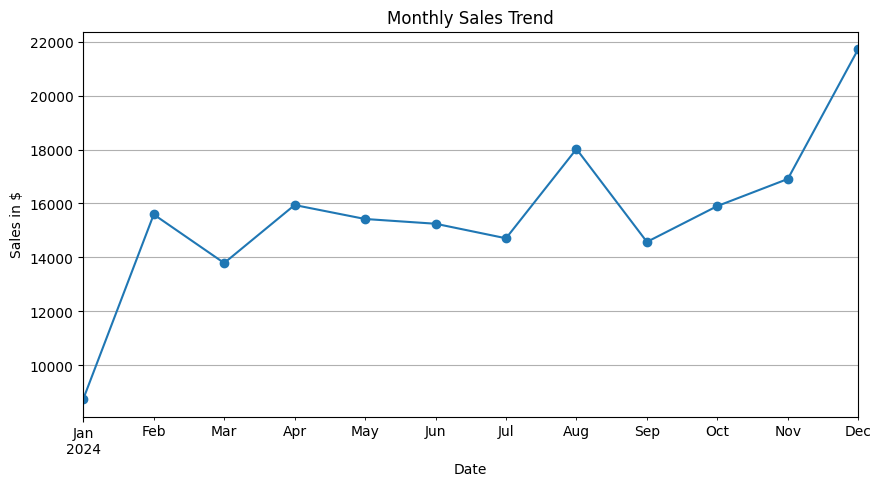

In [38]:

sales_over_time = df_clean.resample('ME')['Total'].sum()

sales_over_time.plot(figsize=(10,5), title="Monthly Sales Trend", marker='o')
plt.ylabel("Sales in $")
plt.grid(True)
plt.show()


### 3. Top Products by Revenue

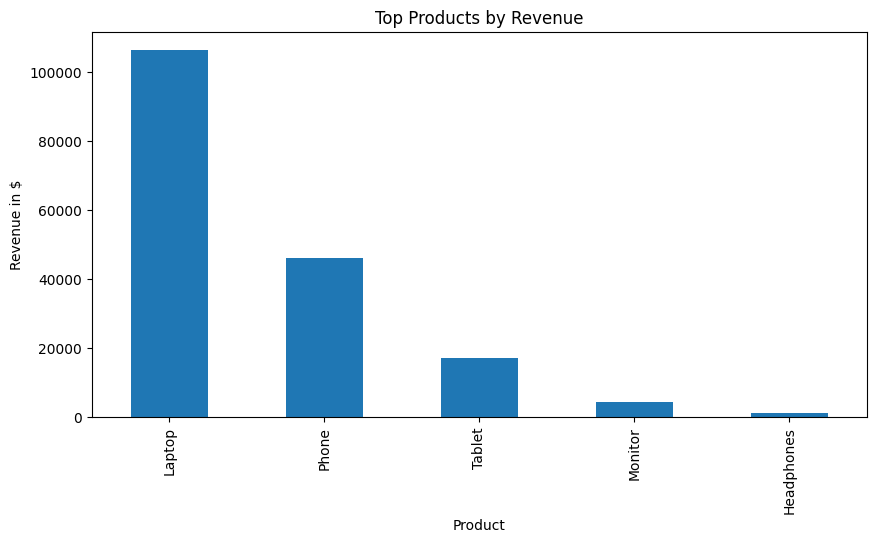

In [39]:
top_products = df.groupby('Product')['Total'].sum().sort_values(ascending=False)
top_products.plot(kind='bar', figsize=(10,5), title='Top Products by Revenue')
plt.ylabel('Revenue in $')
plt.show()


### 4. Quantity Sold per Product

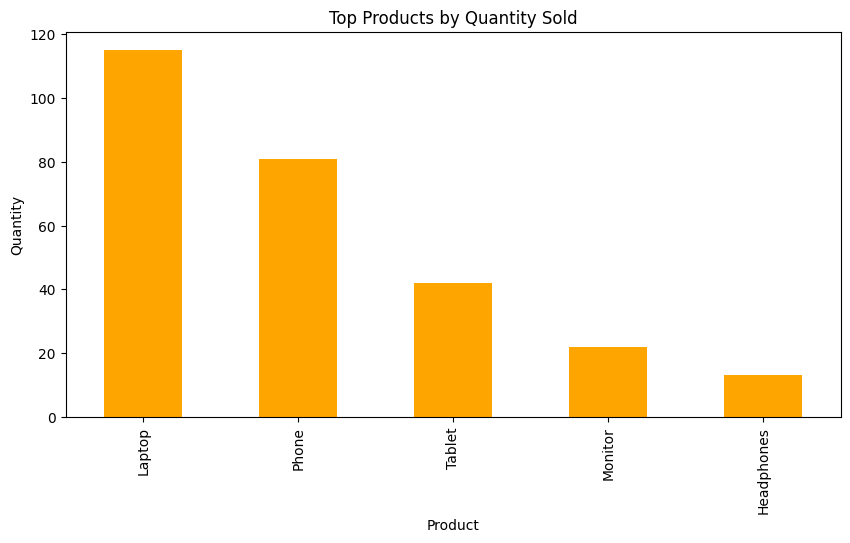

In [31]:
top_quantity = df_clean.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
top_quantity.plot(kind='bar', color='orange', figsize=(10,5), title='Top Products by Quantity Sold')
plt.ylabel('Quantity')
plt.show()


### 5. Average Order Value

In [32]:
aov = df['Total'].mean()
print("Average Order Value: $", round(aov, 2))


Average Order Value: $ 933.01


# Step 5: Customer Behavior

### 1. Most Active Customers

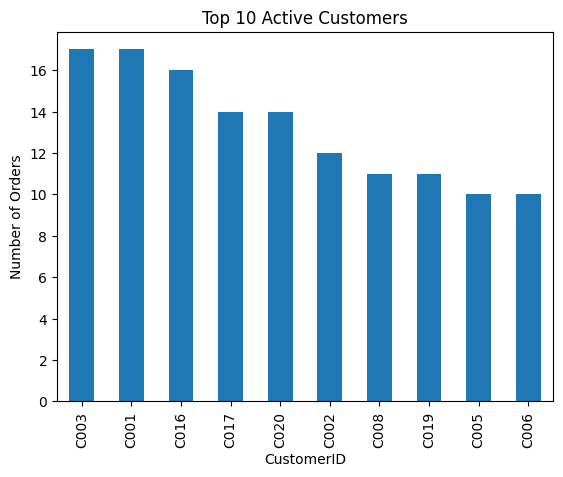

In [33]:
active_customers = df_clean['CustomerID'].value_counts().head(10)
active_customers.plot(kind='bar', title='Top 10 Active Customers')
plt.ylabel('Number of Orders')
plt.show()


### 2. Total Revenue by Customer

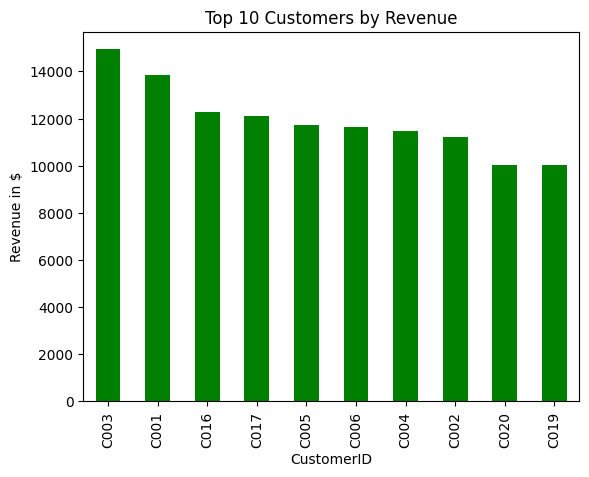

In [34]:
revenue_by_customer = df.groupby('CustomerID')['Total'].sum().sort_values(ascending=False).head(10)
revenue_by_customer.plot(kind='bar', title='Top 10 Customers by Revenue', color='green')
plt.ylabel('Revenue in $')
plt.show()


## Summary:

### Data Analysis Key Findings

* Monthly Sales Trend: Sales show variability across months with a significant spike in December, reaching approximately 21,900, indicatinga seasonal peak. The lowest sales occur in September, around 14,500.

* Top Products by Quantity Sold: The most sold product is the "Laptop" with 115 units, followed by "Phone" (81 units), "Tablet" (42 units), "Monitor" (22 units), and "Headphones" (13 units).

* Top Customers by Orders: The most active customer (CustomerID: C003) placed 17 orders, with other top customers placing between 10-16 orders.

* Top Customers by Revenue: Customer C003 generated the highest revenue (~$14,500), indicating high value or frequent purchases.

* Top Products by Revenue: "Laptop" generated the highest revenue (~$107,000), significantly more than other products, emphasizing its importance to sales.

* Total Revenue: The total sales revenue from all transactions is approximately $186,602.

* Average Order Value: Each order, on average, brought in about $933.

### Insights or Next Steps


* Seasonality: December experience suggests strong seasonal demand, possibly due to holiday sales or other peak shopping periods.

* Product Popularity & Profitability: Laptops not only sell the most units but also generate the highest revenue, indicating high demand and high price point.

* Customer Engagement: Customer C003 appears to be highly engaged both in order volume and revenue contribution, making them a key customer.

* Market Focus: Prioritizing inventory and marketing efforts on high-selling products like laptops and phones could optimize revenue.

* Business Strategy: The high average order value($933) suggests that marketing strategies promoting premium or bundle deals could further increase revenues


In [ ]:
# Save the cleaned DataFrame to Google Drive
df_clean.to_csv('/content/drive/MyDrive/3MTT FOLDER/MINI_PROJECTS/Module_2_mini_project/cleaned_dataset.csv', index=False)